<a href="https://colab.research.google.com/github/kunalburgul/MLDS_Problems/blob/main/recommender_system/book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Book Recommender System**

<img src = "https://miro.medium.com/max/1080/1*81I8dEzTfiMdwMByUcRbag.jpeg">

**Content**

The Book-Crossing dataset comprises 3 files.

***Users***

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

***Books***

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

***Ratings***

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


## **Recommendation System**

A recommendation system helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company.

Let's first download and load the data from the Kaggle : [Book Recommender System
](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqblZtZHFEUmhNX3NtZU9Yek5TazFCN0tKcnRMd3xBQ3Jtc0ttalJMTWdpYzEtYzAwSVQydjlBQ2pDSDVKTGFYMGo0cVpVQk1kMm9zZEY1Zm5aNWdpaUJQcE0zcXZuSlBQX0xVOWFGelpWR0J1QVdNbXdnQmp5UG0yREZ0azVCMWYxb3Q4NExfdXpKX1dGVExINFpwUQ&q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Farashnic%2Fbook-recommendation-dataset&v=1YoD0fg3_EM)

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 21% 5.00M/23.8M [00:00<00:00, 41.7MB/s]
100% 23.8M/23.8M [00:00<00:00, 114MB/s] 


In [4]:
# Extracting the files
import zipfile
zip_ref = zipfile.ZipFile('book-recommendation-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# Some baisc libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Reading the files
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Basic Exploration over the data**

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [13]:
# Let's get the shape of all the 3 dataframes
print("Books -", books.shape, " \nUsers - ", users.shape, " \nRatings -", ratings.shape)

Books - (271360, 8)  
Users -  (278858, 3)  
Ratings - (1149780, 3)


From the above cell of the shape we could observer that there are nearly 270K books and 270K users have rated almost 1200K.

Let's check for the missing values 

In [14]:
books.isna().sum() # isna() and isnull() both works in the same way

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

There seems very few features with veryr minor values which may be dealt on the way further.

In [15]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

It looks like there are most missing values of the age column, but as per our approch that we will be used further this feature may be not that useful to us. So lets move forward.

In [16]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Now, let's check if there are any duplicated values in all the features.

In [17]:
books.duplicated().sum()

0

In [18]:
users.duplicated().sum(),

(0,)

In [19]:
ratings.duplicated().sum()

0

## **Performing the some basic EDA**

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Year of publication and the publishers look like most interesting features from the books dataframe let's explore and visualize them.

Above in the books.info() we observed that Year-Of-Publications is of an object -> Dtype the value are numeric values are in the string format so lets convert this data to the numeric -> Dtype



In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

- There seem be a numeric and string values both present in the column. 

- So let's remove the unnecessary samples and get most info out data.

In [ ]:
# Removing String features sample from the complete data i.e DK Publishing Inc', 'Gallimard'
index=books.loc[books['Year-Of-Publication']=='DK Publishing Inc'].index
books.drop(index,inplace=True)
index=books.loc[books['Year-Of-Publication']=='Gallimard'].index
books.drop(index,inplace=True)

# However, the string value '0' and numeric value 0 is invalid and as this dataset was published in 2004
books['Year-Of-Publication'].replace({'0':books['Year-Of-Publication'].value_counts().idxmax()},inplace=True)
books['Year-Of-Publication'].replace({0:books['Year-Of-Publication'].value_counts().idxmax()},inplace=True)

# Converting the object dtype of the feature to the int dtype
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str).astype(int)
np.sort(books['Year-Of-Publication'].unique()), len(np.sort(books['Year-Of-Publication'].unique()))

(array([1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909,
        1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
        1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
        1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
        1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
        1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
        1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024,
        2026, 2030, 2037, 2038, 2050]), 115)

In [ ]:
# Let's have look at what is the range of year staring and ending value present in the data
books['Year-Of-Publication'].describe()

count    271357.000000
mean       1993.831197
std           8.324345
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

In [ ]:
books['Year-Of-Publication'].value_counts().nunique()

70

Finally after processing we have data ranging form 1376 to 2050 with aboth 115 years.

 



Now let's check how the data is books is distributed over the period of time using the histplot and the distplot.


In [ ]:
books['Year-Of-Publication'].value_counts().unique()

array([22245, 17431, 17359, 17232, 15766, 14890, 14358, 14030, 13546,
       11796, 10602,  9906,  9389,  8660,  7936,  7492,  6529,  5841,
        5839,  5343,  4986,  4499,  4197,  3279,  2676,  2208,  2131,
        1897,  1597,  1219,  1023,   923,   772,   540,   459,   339,
         233,   183,   176,   173,   149,   133,   132,   123,   103,
          77,    76,    74,    70,    63,    54,    46,    40,    36,
          34,    33,    32,    19,    14,    13,    11,    10,     9,
           8,     7,     5,     4,     3,     2,     1])

In [ ]:
time_line = np.sort(books['Year-Of-Publication'].unique())
time_line, len(time_line)

(array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
        1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
        1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
        1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
        1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
        1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
        1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
        1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
        1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
        2024, 2026, 2030, 2037, 2038, 2050]), 116)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


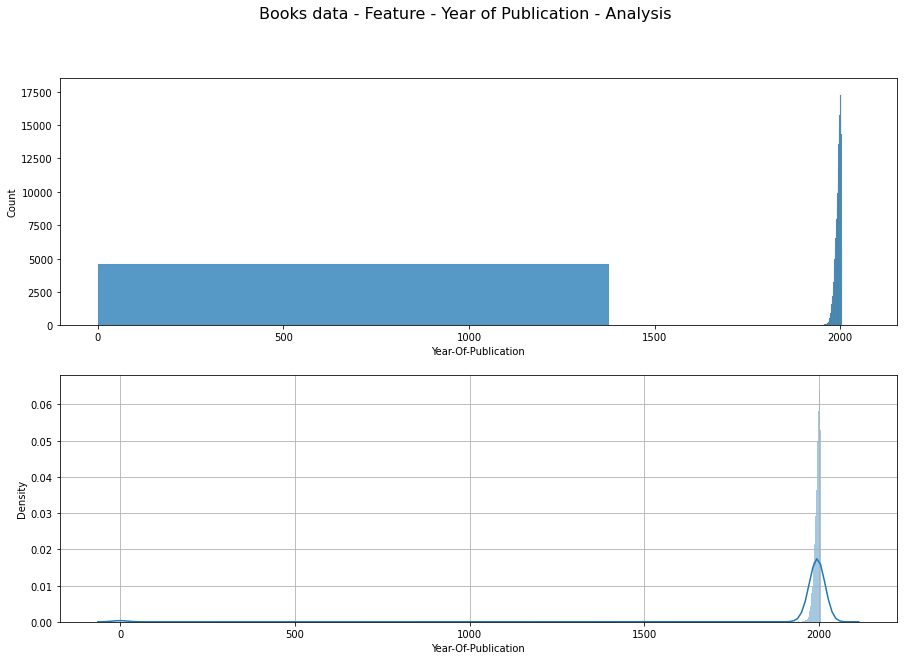

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
sns.histplot(books['Year-Of-Publication'],bins=time_line, ax=ax1);
plt.grid(True)
sns.distplot(books['Year-Of-Publication'],bins=time_line, ax=ax2);
fig.suptitle('Books data - Feature - Year of Publication - Analysis', fontsize=16);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


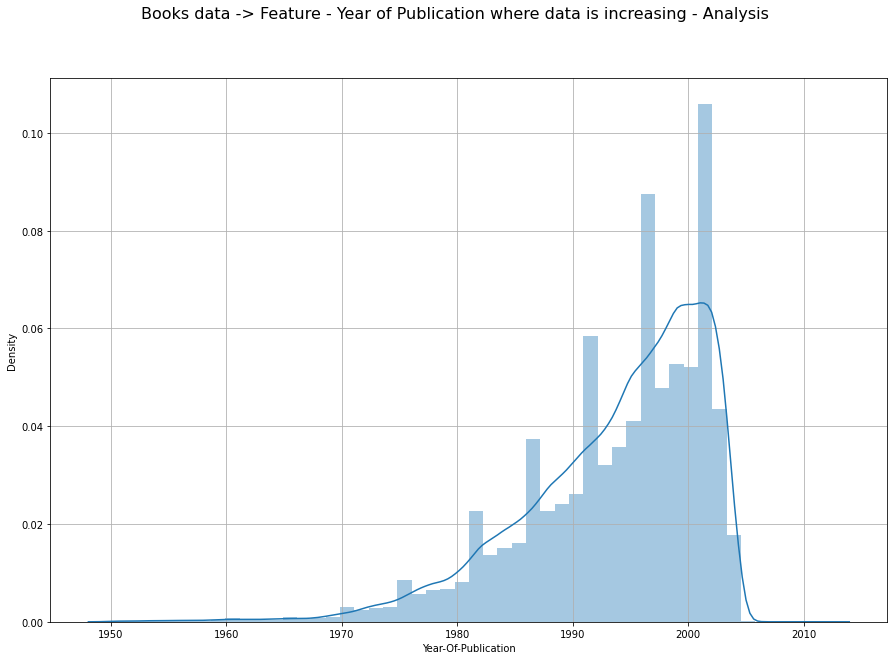

In [ ]:
# books_1 = books[(books['Year-Of-Publication'])]
books_1 = books[(books['Year-Of-Publication']>=1950) & (books['Year-Of-Publication']<=2016)]
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
plt.grid(True)
sns.distplot(books_1['Year-Of-Publication'], ax=ax1);
fig.suptitle('Books data -> Feature - Year of Publication where data is increasing - Analysis', fontsize=16);

From the above figures it can be observed that this datset contain most of the book published in the year of 1970 tot 2005.The graph start increasing from 1970 till 2000 and after 2000 it deacreases till 2005. 

And seems like nearly about more than 10% of total data of  the books are  published in the year 2000. Further let's look into the publisher..

In [ ]:
# Lets look at the top 10 publishers with maximum no.of publications 
my_dict=(books['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishers_name','count'])
publishers_name = count.sort_values(by=['count'], ascending = False)
publishers_name.head(10)

,Publishers_name,count
0,Harlequin,7535
1,Silhouette,4220
2,Pocket,3905
3,Ballantine Books,3783
4,Bantam Books,3646
5,Scholastic,3160
6,Simon &amp; Schuster,2971
7,Penguin Books,2844
8,Berkley Publishing Group,2771
9,Warner Books,2727


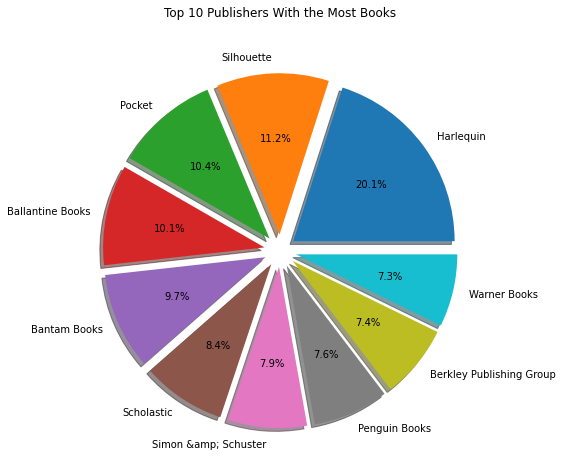

In [ ]:
labels = list(my_dict.keys())[:10]
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6], count['count'].iloc[7],count['count'].iloc[8], count['count'].iloc[9]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1, 0.1, 0.1,0.1)
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 10 Publishers With the Most Books",  y=1.1) # y is just a distance which was merging with one of  the feature
ax1.axis ('equal')
plt.show()

Here we have drawn the top 10 Publishers and it could be observed that Harlequin has the max number of publication of nearly 20% of the complete books data.



## **Popularity based Recommended System**

In [22]:
ratings_with_name = ratings.merge(books, on='ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [25]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)
num_rating_df


,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [31]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)
avg_rating_df


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [32]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [36]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating', ascending=False).head(50)

In [39]:
popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_rating']]

In [42]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [44]:
 popular_df.shape

(50, 5)

## **Collabrative Filtering based Recommended System**

In [49]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
educated_users = x[x].index

In [51]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(educated_users)]

In [55]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [58]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [62]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [63]:
pt.fillna(0, inplace=True)

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
similarity_scores = cosine_similarity(pt)

In [80]:
similarity_scores.shape

(706, 706)

In [81]:
np.where(pt.index=='1984')[0][0] 

0

In [82]:
np.where(pt.index=='Zoya')[0][0] 

704

In [103]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0] 
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse=True)[1:6]

    for i in similar_items:
        print(pt.index[i[0]])



In [104]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [105]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [106]:
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [107]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel


In [108]:
recommend('The Hobbit : The Enchanting Prelude to The Lord of the Rings')

The Two Towers (The Lord of the Rings, Part 2)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Where the Red Fern Grows
One for the Money (A Stephanie Plum Novel)
The Return of the King (The Lord of the Rings, Part 3)


In [109]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
